In [2]:
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/home/ramo/Scrivania/Analysis/data.csv', index_col='Counter')

In [4]:
data

,Date/time,Latitude,Longitude,Mag_x,Mag_y,Mag_z,Label1,Label2
Counter,,,,,,,,
1,2022-04-21 05:38:08.013238,-46.409194,-90.915118,1.339141,-2.212412,-4.512149,dark,other
2,2022-04-21 05:38:24.138337,-45.946504,-89.655609,2.403312,-4.300591,-7.915128,dark,other
3,2022-04-21 05:38:40.263087,-45.464643,-88.408151,3.377218,-5.963129,-10.607705,dark,other
4,2022-04-21 05:38:56.370510,-44.967865,-87.183156,4.006250,-7.095662,-12.462585,dark,other
5,2022-04-21 05:39:12.469331,-44.457227,-85.981789,4.654647,-8.031365,-14.098703,dark,other
...,...,...,...,...,...,...,...,...
538,2022-04-21 08:02:41.653962,34.686166,75.106496,-9.272785,-14.423191,28.266285,light,other
539,2022-04-21 08:02:57.823660,33.992827,75.987179,-9.712952,-14.546340,27.989834,light,other
540,2022-04-21 08:03:13.994643,33.292373,76.852360,-10.253723,-14.764579,27.558025,light,other


In [5]:
#calcolo campo magnetico
data['mag'] = np.sqrt(data['Mag_x']**2 + data['Mag_y']**2 + data['Mag_z']**2) 

In [6]:
data

,Date/time,Latitude,Longitude,Mag_x,Mag_y,Mag_z,Label1,Label2,mag
Counter,,,,,,,,,
1,2022-04-21 05:38:08.013238,-46.409194,-90.915118,1.339141,-2.212412,-4.512149,dark,other,5.200727
2,2022-04-21 05:38:24.138337,-45.946504,-89.655609,2.403312,-4.300591,-7.915128,dark,other,9.323103
3,2022-04-21 05:38:40.263087,-45.464643,-88.408151,3.377218,-5.963129,-10.607705,dark,other,12.628853
4,2022-04-21 05:38:56.370510,-44.967865,-87.183156,4.006250,-7.095662,-12.462585,dark,other,14.890080
5,2022-04-21 05:39:12.469331,-44.457227,-85.981789,4.654647,-8.031365,-14.098703,dark,other,16.880225
...,...,...,...,...,...,...,...,...,...
538,2022-04-21 08:02:41.653962,34.686166,75.106496,-9.272785,-14.423191,28.266285,light,other,33.060488
539,2022-04-21 08:02:57.823660,33.992827,75.987179,-9.712952,-14.546340,27.989834,light,other,33.005579
540,2022-04-21 08:03:13.994643,33.292373,76.852360,-10.253723,-14.764579,27.558025,light,other,32.902529


<AxesSubplot:xlabel='Counter'>

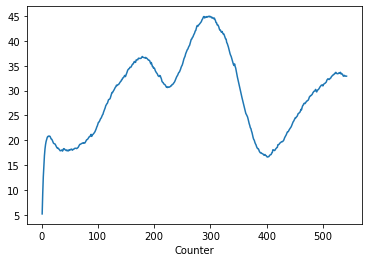

In [7]:
#grafico campo magnetico
data['mag'].plot()

<AxesSubplot:>

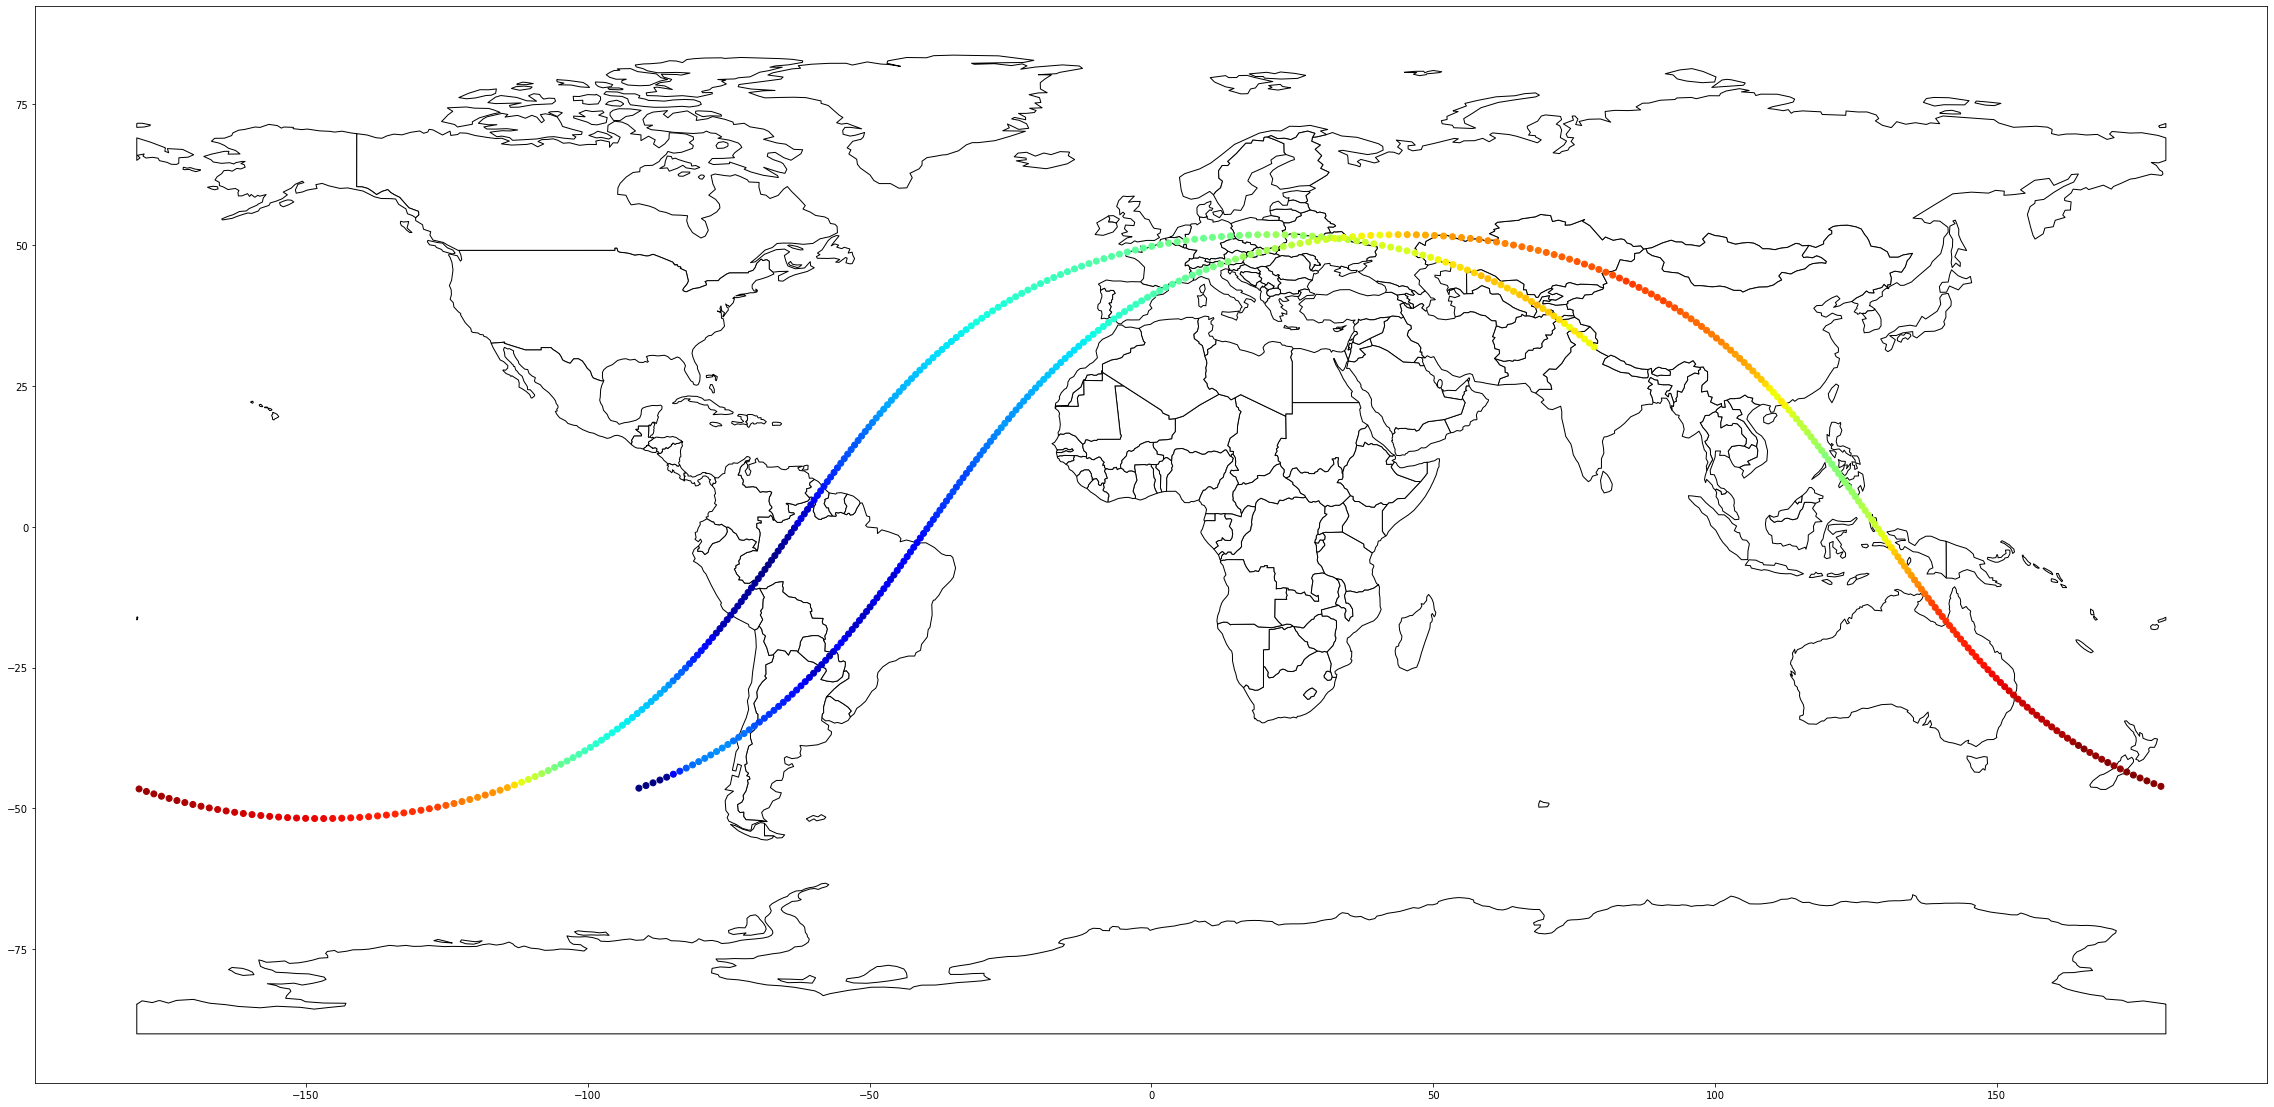

In [8]:
#traiettoria con valori del campo magnetico

data = data.sort_values(by=['mag'])

gdf = geopandas.GeoDataFrame(
    data, geometry=geopandas.points_from_xy(data.Longitude, data.Latitude))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world.plot(color='white', edgecolor='black', figsize=(40,40))

gdf.plot(ax=ax, c = data['mag'], cmap = 'jet')


<AxesSubplot:>

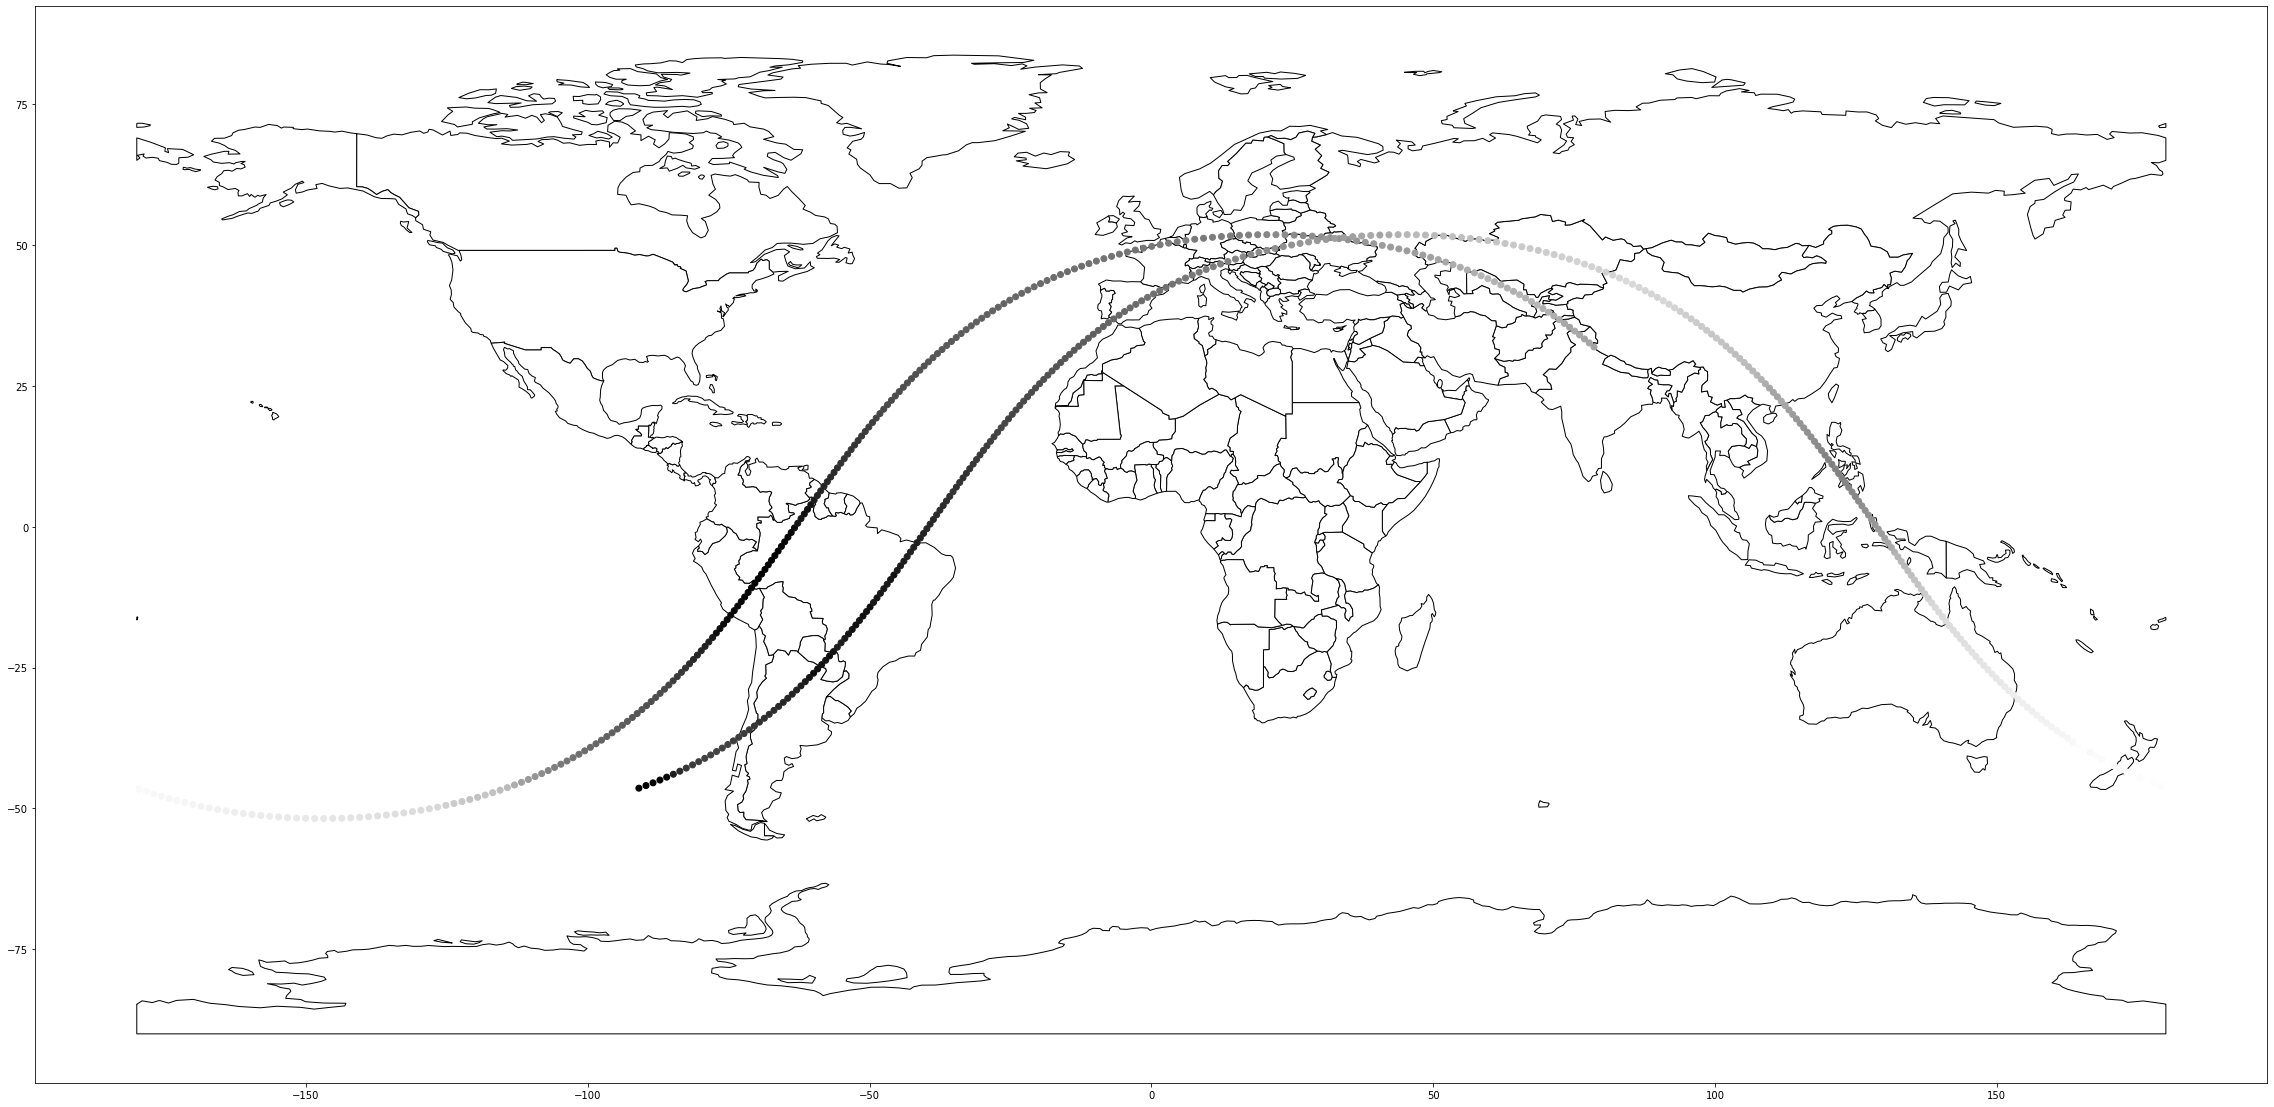

In [9]:
#traiettoria con valori di giorno e notte

gdf = geopandas.GeoDataFrame(
    data, geometry=geopandas.points_from_xy(data.Longitude, data.Latitude))

ax = world.plot(color='white', edgecolor='black', figsize=(40,40))

gdf.plot(ax=ax, c = data['Label1'], cmap = 'gist_gray')

<AxesSubplot:xlabel='Longitude', ylabel='mag'>

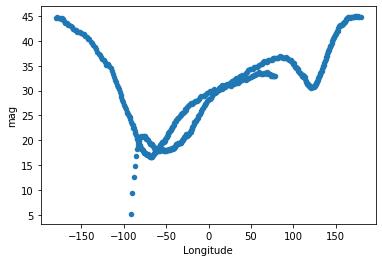

In [10]:
#rapporto longitudine e campo magnetico
data.plot.scatter(x='Longitude', y='mag')

<AxesSubplot:xlabel='Latitude', ylabel='mag'>

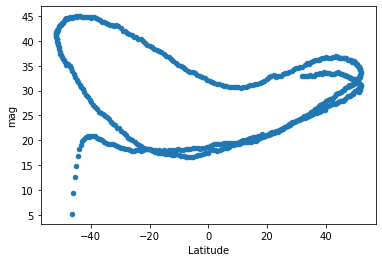

In [11]:
#rapporto latitudine e campo magnetico
data.plot.scatter(x='Latitude', y='mag')

<AxesSubplot:xlabel='Counter'>

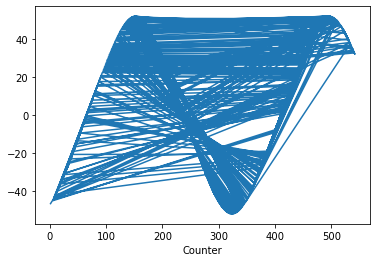

In [12]:
#latitudine
data['Latitude'].plot()

<AxesSubplot:xlabel='Counter'>

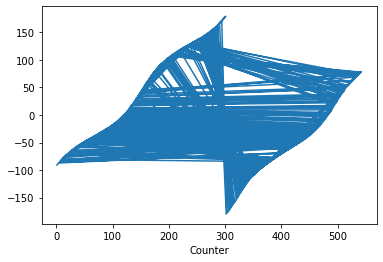

In [13]:
#longitudine
data['Longitude'].plot()

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

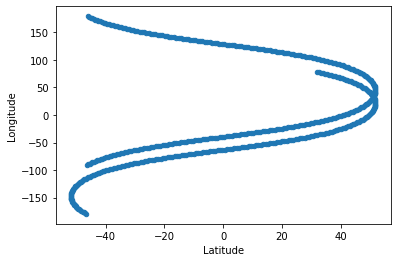

In [14]:
#rapporto latitudine e longitudine
data.plot.scatter(x='Latitude', y='Longitude')

<AxesSubplot:xlabel='Date/time', ylabel='mag'>

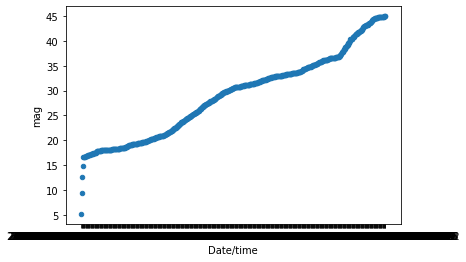

In [15]:
#rapporto tempo e campo magnetico
data.plot.scatter(x='Date/time', y='mag')

In [16]:
data1 = pd.read_csv('/home/ramo/Scrivania/Analysis/data_l.csv', index_col='Counter')

In [17]:
data1

,Date/time,Latitude,Longitude,Mag_x,Mag_y,Mag_z,Label1,Label2,LuminositaNotturna
Counter,,,,,,,,,
1,2022-04-21 05:38:08.013238,-46.409194,-90.915118,1.339141,-2.212412,-4.512149,dark,other,35.0
2,2022-04-21 05:38:24.138337,-45.946504,-89.655609,2.403312,-4.300591,-7.915128,dark,other,48.0
3,2022-04-21 05:38:40.263087,-45.464643,-88.408151,3.377218,-5.963129,-10.607705,dark,other,201.0
4,2022-04-21 05:38:56.370510,-44.967865,-87.183156,4.006250,-7.095662,-12.462585,dark,other,77.0
5,2022-04-21 05:39:12.469331,-44.457227,-85.981789,4.654647,-8.031365,-14.098703,dark,other,64.0
...,...,...,...,...,...,...,...,...,...
538,2022-04-21 08:02:41.653962,34.686166,75.106496,-9.272785,-14.423191,28.266285,light,other,NaN
539,2022-04-21 08:02:57.823660,33.992827,75.987179,-9.712952,-14.546340,27.989834,light,other,NaN
540,2022-04-21 08:03:13.994643,33.292373,76.852360,-10.253723,-14.764579,27.558025,light,other,NaN


In [26]:
data1['Counter'] = data1.index

In [27]:
data1

,Date/time,Latitude,Longitude,Mag_x,Mag_y,Mag_z,Label1,Label2,LuminositaNotturna,Counter
Counter,,,,,,,,,,
1,2022-04-21 05:38:08.013238,-46.409194,-90.915118,1.339141,-2.212412,-4.512149,dark,other,35.0,1
2,2022-04-21 05:38:24.138337,-45.946504,-89.655609,2.403312,-4.300591,-7.915128,dark,other,48.0,2
3,2022-04-21 05:38:40.263087,-45.464643,-88.408151,3.377218,-5.963129,-10.607705,dark,other,201.0,3
4,2022-04-21 05:38:56.370510,-44.967865,-87.183156,4.006250,-7.095662,-12.462585,dark,other,77.0,4
5,2022-04-21 05:39:12.469331,-44.457227,-85.981789,4.654647,-8.031365,-14.098703,dark,other,64.0,5
...,...,...,...,...,...,...,...,...,...,...
538,2022-04-21 08:02:41.653962,34.686166,75.106496,-9.272785,-14.423191,28.266285,light,other,NaN,538
539,2022-04-21 08:02:57.823660,33.992827,75.987179,-9.712952,-14.546340,27.989834,light,other,NaN,539
540,2022-04-21 08:03:13.994643,33.292373,76.852360,-10.253723,-14.764579,27.558025,light,other,NaN,540


<AxesSubplot:xlabel='Counter', ylabel='LuminositaNotturna'>

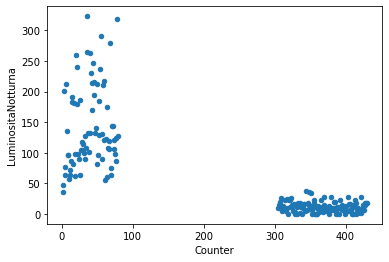

In [28]:
data1.plot.scatter(x='Counter', y='LuminositaNotturna')

In [29]:
data1[data1['Counter'] == 78]

,Date/time,Latitude,Longitude,Mag_x,Mag_y,Mag_z,Label1,Label2,LuminositaNotturna,Counter
Counter,,,,,,,,,,
78,2022-04-21 05:58:48.732309,10.272157,-32.213127,11.143792,-15.779265,-3.797639,dark,other,318.0,78
